In [1]:
from math import dist
import numpy as np
import pandas as pd
import os
from pyparsing import col

from matplotlib import pyplot as plt
from matplotlib.ticker import NullFormatter

from sklearn import manifold
from sklearn.decomposition import PCA, KernelPCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.neighbors import NearestNeighbors

import csv
import seaborn as sns
from collections import OrderedDict
from functools import partial
from time import time
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.hierarchy import dendrogram, linkage

Axes3D

import sys
print(sys.getrecursionlimit())
sys.setrecursionlimit(100000)
print(sys.getrecursionlimit())

3000
100000


In [2]:
directory = os.getcwd()

print(directory)

/Users/sweintraub/Documents/WPI/Young/data/comparative_dh/unsupervisedClustering


In [3]:
data = pd.read_csv('../output/sigDEGS_ds.csv')
# data.rename(columns = {data.columns[0]: "proteinId"}, inplace = True)
print(data)

      Unnamed: 0  proteinId         cont       cont.1       cont.2  \
0              1     100862  1035.581410   954.851821  1059.364625   
1              2     100864   233.773991   226.829428   190.175095   
2              3     100868   257.026821   241.840199   174.433533   
3              4     100873   613.293401   628.784518   622.855346   
4              5     101038   764.021569   763.047525   728.366361   
...          ...        ...          ...          ...          ...   
3278        3279      96459   545.195826   536.218097   345.888932   
3279        3280      96477   448.032214   480.344672   616.048184   
3280        3281      96522  1100.357152   958.187548  1648.184160   
3281        3282      96538   931.774131  1025.736017  1099.782151   
3282        3283      96541   750.319009   723.852734   452.676290   

             lowN       lowN.1       lowN.2          salt        salt.1  \
0     1146.836752   994.643557   853.385240    195.069797    320.215017   
1      24

In [4]:
print(data.shape)

(3283, 14)


In [5]:
features = ['cont', 'cont.1', 'cont.2', 'lowN', 'lowN.1', 'lowN.2', 'salt', 'salt.1', 'salt.2', 'lowFE', 'lowFE.1', 'lowFE.2']

counts = data.loc[:,features].values
proteinId = data.loc[:,['proteinId']]

print(counts.shape)
print(proteinId.shape)

(3283, 12)
(3283, 1)


In [6]:
counts

array([[1035.58140986,  954.85182102, 1059.36462539, ...,  695.42927412,
         639.65799315,  475.63581339],
       [ 233.77399108,  226.82942822,  190.1750954 , ...,  202.5425289 ,
         175.11549622,   82.80708428],
       [ 257.02682145,  241.84019921,  174.4335327 , ...,  151.65746007,
         179.0069517 ,  127.2401539 ],
       ...,
       [1100.35715161,  958.1875479 , 1648.18416015, ..., 2768.74639264,
        2083.38797314, 6541.75965842],
       [ 931.7741314 , 1025.73601734, 1099.78215126, ..., 1079.56165652,
        1087.17537239,  941.17320186],
       [ 750.31900867,  723.85273419,  452.67628973, ...,  672.48110582,
         713.10921518,  201.96849825]])

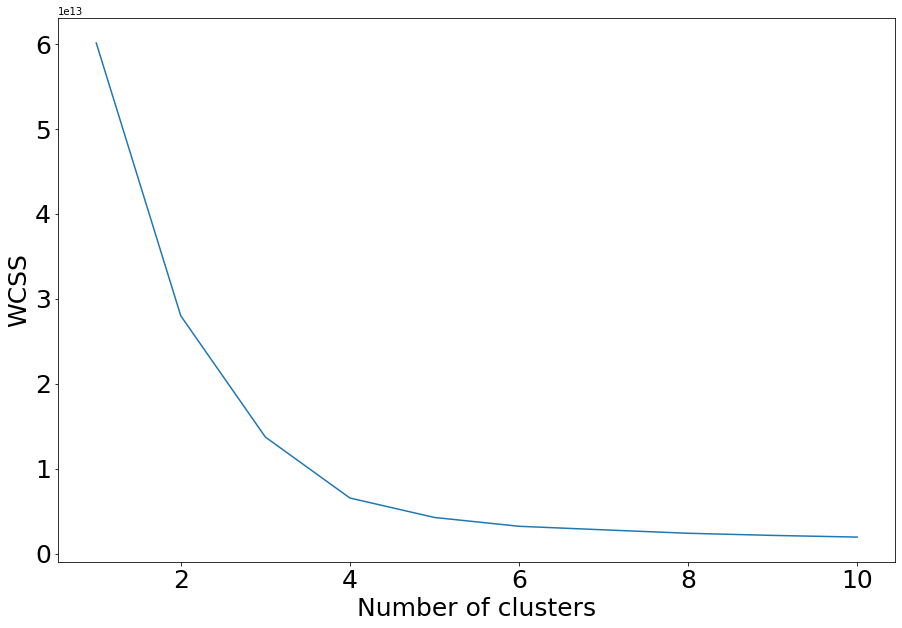

In [7]:
wcss = []
for i in range(1,11):
   model = KMeans(n_clusters = i, init = "k-means++", random_state=3009)
   model.fit(counts)
   wcss.append(model.inertia_)
plt.figure(figsize=(15,10))
plt.plot(range(1,11), wcss)
plt.xlabel('Number of clusters',fontsize=25)
plt.ylabel('WCSS',fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.savefig('WCSS_ds.pdf')

 It looks like we can do 4-8 clusters

In [8]:
pca = PCA(2)
counts_transformed = pca.fit_transform(counts)

<BarContainer object of 2 artists>

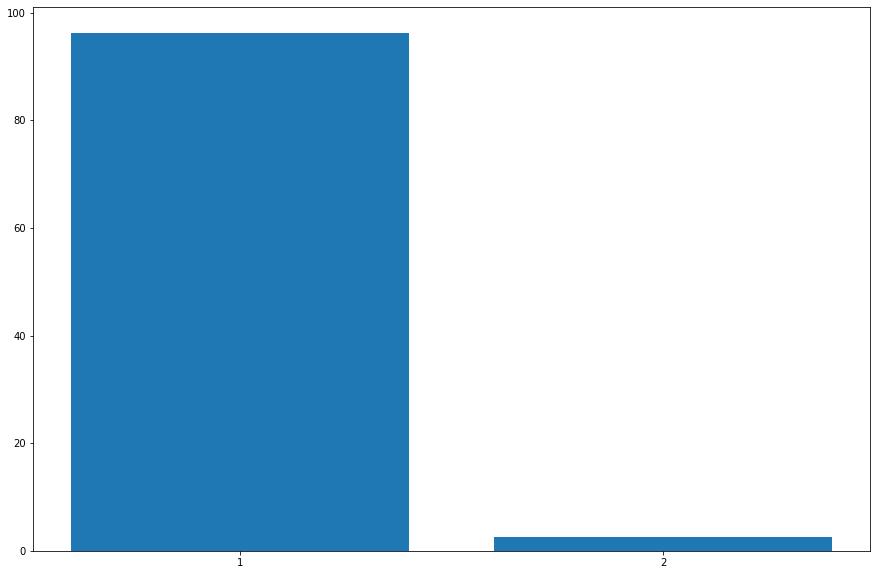

In [9]:
plt.figure(figsize=(15,10))
var = np.round(pca.explained_variance_ratio_*100, decimals = 1)
lbls = [str(counts) for counts in range(1,len(var)+1)]
plt.bar(x=range(1,len(var)+1), height = var, tick_label = lbls)

In [10]:
df = data.set_index('proteinId')
# df

In [11]:
conditions = list(df.columns.values) 

# conditions

In [12]:
proteinIds = list(df.index)
# proteinIds

 # PCA by proteinID

Cluster 0 has 3137 genes
Cluster 1 has 2 genes
Cluster 2 has 128 genes
Cluster 3 has 16 genes


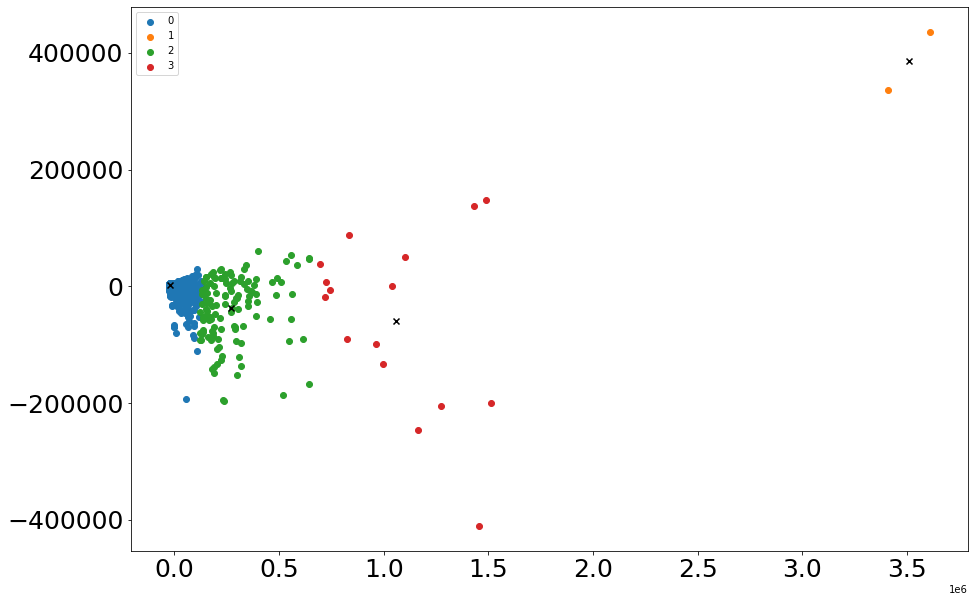

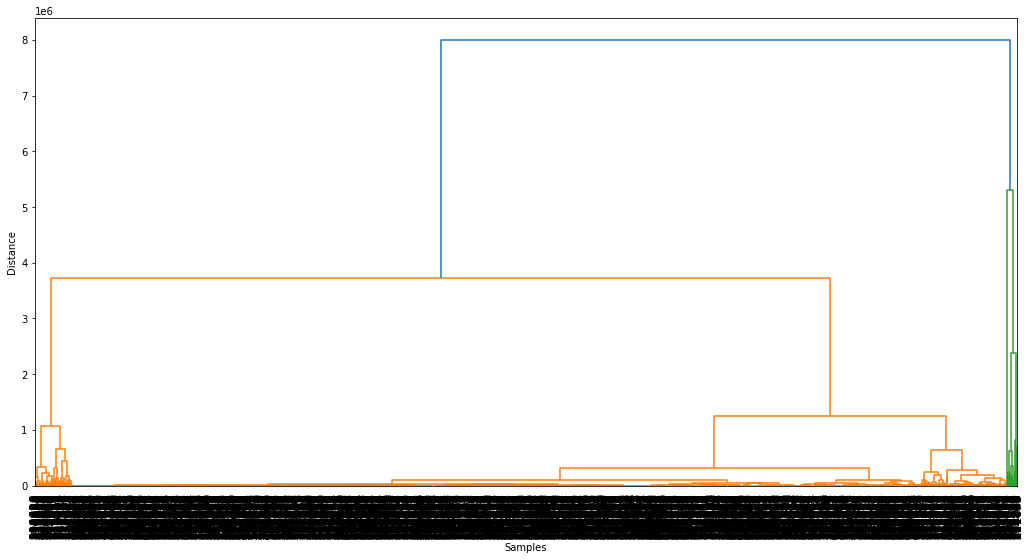

In [13]:
model = KMeans(n_clusters = 4, init = "k-means++", algorithm="elkan")
label = model.fit_predict(counts_transformed)
centers = np.array(model.cluster_centers_)
plt.figure(figsize=(15,10))
uniq = np.unique(label)
for i in uniq:
   plt.scatter(counts_transformed[label == i , 0] , counts_transformed[label == i , 1] , label = i)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
# find the centroid for each cluster
plt.legend()


counts = df.values
cluster_samples = linkage(counts_transformed, method='ward', metric='euclidean')

plt.figure(figsize=(15,10))
ax = plt.subplot()
plt.subplots_adjust(left=0.07, bottom=0.3, right=0.98, top=0.95,
wspace=0, hspace=0)
plt.xlabel('Samples')
plt.ylabel('Distance')
dendrogram(cluster_samples, 
    leaf_rotation=90., 
    leaf_font_size=12., 
    labels=proteinIds, 
    )

plt.savefig('dendrogram_samples_ds_n4.pdf')

cluster0 = counts_transformed[label == 0]
print("Cluster 0 has", len(cluster0), "genes", sep = " ")

cluster1 = counts_transformed[label == 1]
print("Cluster 1 has", len(cluster1), "genes", sep = " ")

cluster2 = counts_transformed[label == 2]
print("Cluster 2 has", len(cluster2), "genes", sep = " ")

cluster3 = counts_transformed[label == 3]
print("Cluster 3 has", len(cluster3), "genes", sep = " ")

Cluster 4 has 344 genes
Cluster 5 has 82 genes
Cluster 6 has 2575 genes
Cluster 7 has 136 genes


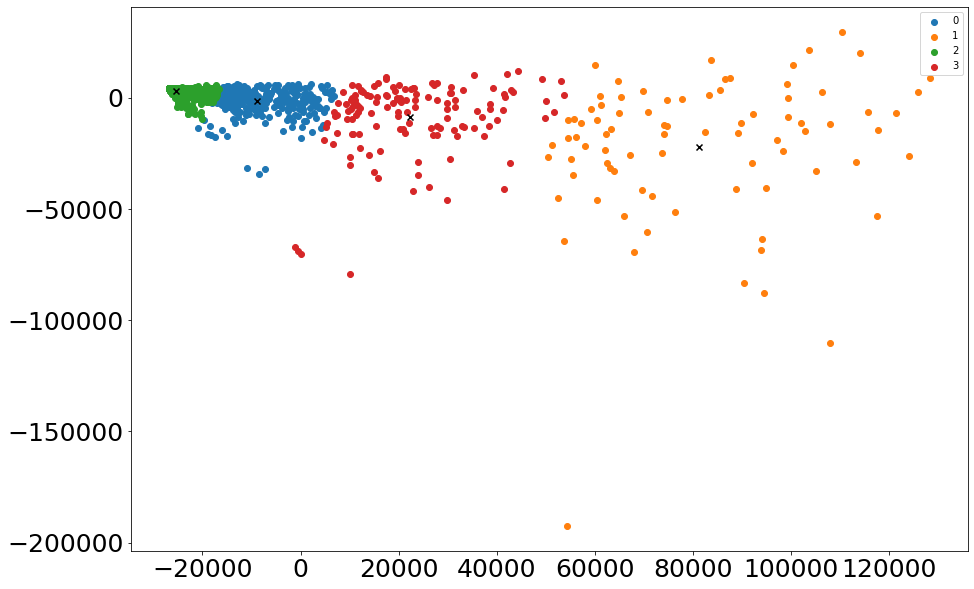

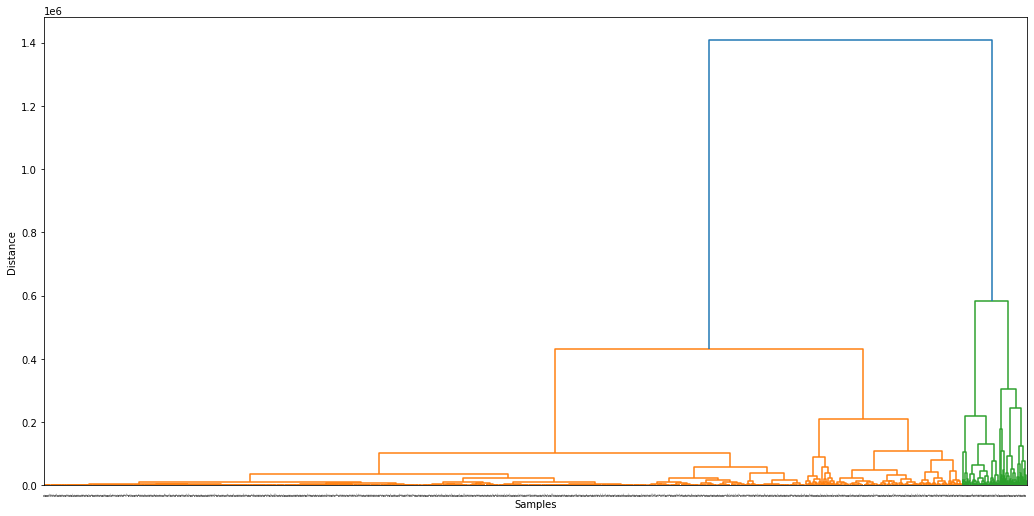

In [14]:
model = KMeans(n_clusters = 4, init = "k-means++", algorithm="elkan", random_state=3009)
label = model.fit_predict(cluster0)
centers = np.array(model.cluster_centers_)
plt.figure(figsize=(15,10))
uniq = np.unique(label)
for i in uniq:
   plt.scatter(cluster0[label == i , 0] , cluster0[label == i , 1] , label = i)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
# find the centroid for each cluster
plt.legend()
plt.savefig('kmeans_elkan_4_ds.pdf')

cluster0_samples = linkage(cluster0, method='ward', metric='euclidean')

plt.figure(figsize=(15,10))
ax = plt.subplot()
plt.subplots_adjust(left=0.07, bottom=0.3, right=0.98, top=0.95,
wspace=0, hspace=0)
plt.xlabel('Samples')
plt.ylabel('Distance')
dendrogram(cluster0_samples, leaf_rotation=90., leaf_font_size=1.)
plt.savefig('dendrogram0_4_samples_ds.pdf')

cluster4 = cluster0[label == 0]
print("Cluster 4 has", len(cluster4), "genes", sep = " ")

cluster5 = cluster0[label == 1]
print("Cluster 5 has", len(cluster5), "genes", sep = " ")

cluster6 = cluster0[label == 2]
print("Cluster 6 has", len(cluster6), "genes", sep = " ")

cluster7 = cluster0[label == 3]
print("Cluster 7 has", len(cluster7), "genes", sep = " ")

Cluster 8 has 171 genes
Cluster 9 has 98 genes
Cluster 10 has 20 genes
Cluster 11 has 55 genes


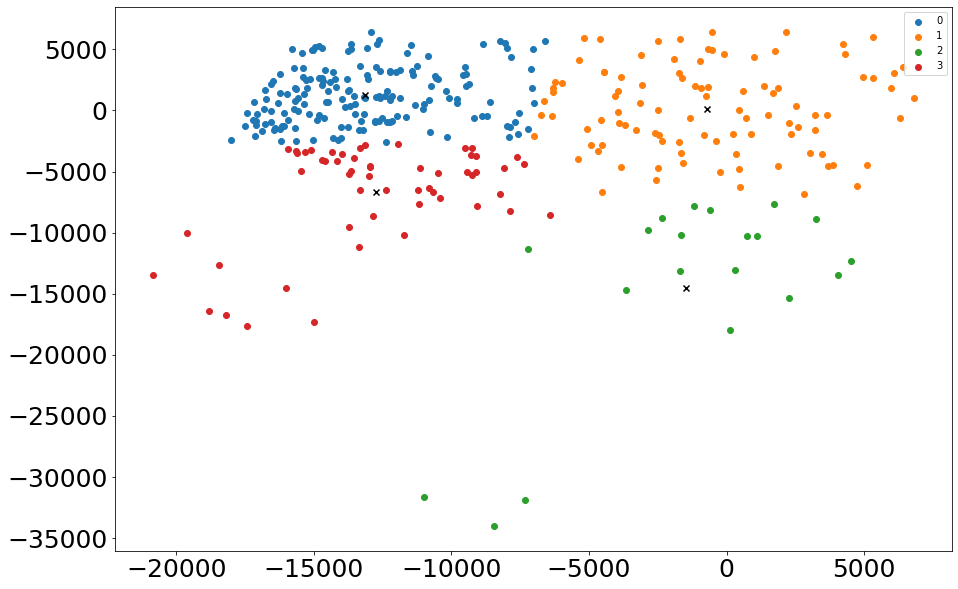

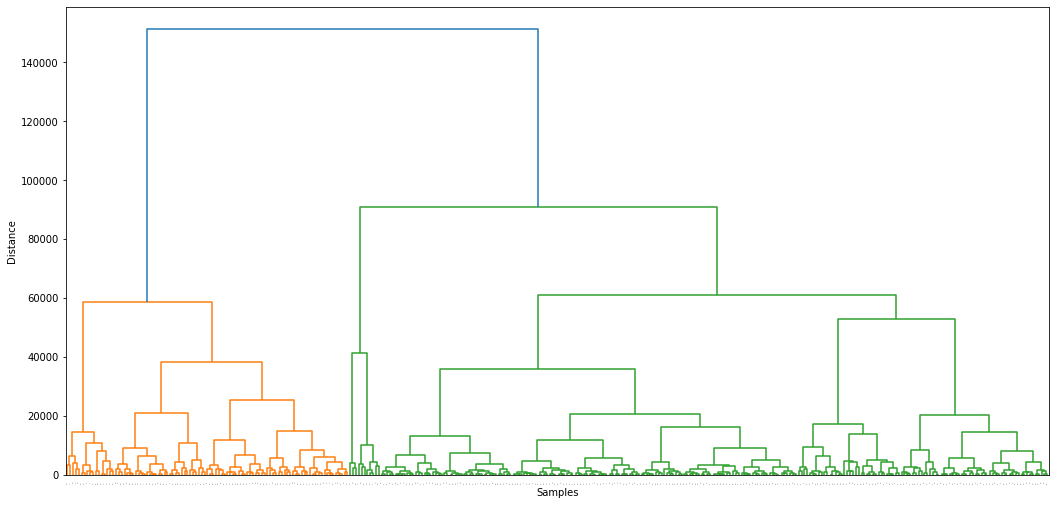

In [15]:
model = KMeans(n_clusters = 4, init = "k-means++", algorithm="elkan", random_state=3009)
label = model.fit_predict(cluster4)
centers = np.array(model.cluster_centers_)
plt.figure(figsize=(15,10))
uniq = np.unique(label)
for i in uniq:
   plt.scatter(cluster4[label == i , 0] , cluster4[label == i , 1] , label = i)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
# find the centroid for each cluster
plt.legend()

cluster4_samples = linkage(cluster4, method='ward', metric='euclidean')

plt.figure(figsize=(15,10))
ax = plt.subplot()
plt.subplots_adjust(left=0.07, bottom=0.3, right=0.98, top=0.95,
wspace=0, hspace=0)
plt.xlabel('Samples')
plt.ylabel('Distance')
dendrogram(cluster4_samples, leaf_rotation=90., leaf_font_size=1.)
plt.savefig('dendrogram4_4_samples_ds.pdf')

cluster8 = cluster4[label == 0]
print("Cluster 8 has", len(cluster8), "genes", sep = " ")

cluster9 = cluster4[label == 1]
print("Cluster 9 has", len(cluster9), "genes", sep = " ")

cluster10 = cluster4[label == 2]
print("Cluster 10 has", len(cluster10), "genes", sep = " ")

cluster11 = cluster4[label == 3]
print("Cluster 11 has", len(cluster11), "genes", sep = " ")

 # Kernel PCA comparison

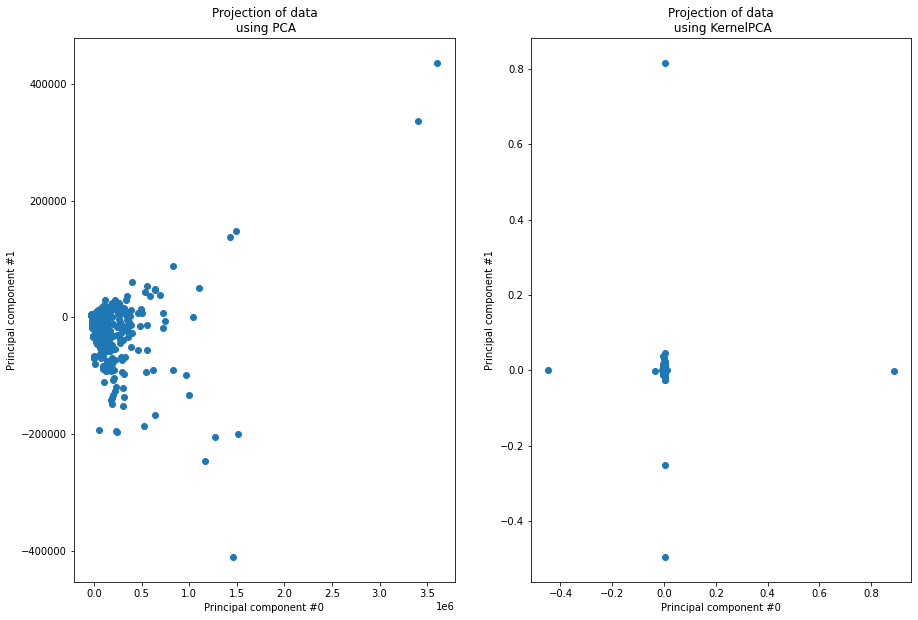

In [16]:
pca = PCA(n_components=2)
rbf_kernel_pca = KernelPCA(
    n_components=None, kernel="rbf", gamma=10, fit_inverse_transform=True, alpha=0.1, random_state=3009
)

counts_pca = pca.fit(counts).transform(counts)
rbf_counts_kernel_pca = rbf_kernel_pca.fit(counts).transform(counts)

fig, (pca_proj_ax, rbf_counts_kernel_pca_proj_ax) = plt.subplots(
    ncols=2, figsize=(15,10)
)

pca_proj_ax.scatter(counts_pca[:, 0], counts_pca[:, 1])
pca_proj_ax.set_ylabel("Principal component #1")
pca_proj_ax.set_xlabel("Principal component #0")
pca_proj_ax.set_title("Projection of data\n using PCA")

rbf_counts_kernel_pca_proj_ax.scatter(rbf_counts_kernel_pca[:, 0], rbf_counts_kernel_pca[:, 1])
rbf_counts_kernel_pca_proj_ax.set_ylabel("Principal component #1")
rbf_counts_kernel_pca_proj_ax.set_xlabel("Principal component #0")
_ = rbf_counts_kernel_pca_proj_ax.set_title("Projection of data\n using KernelPCA")

 Polynomial KPCA

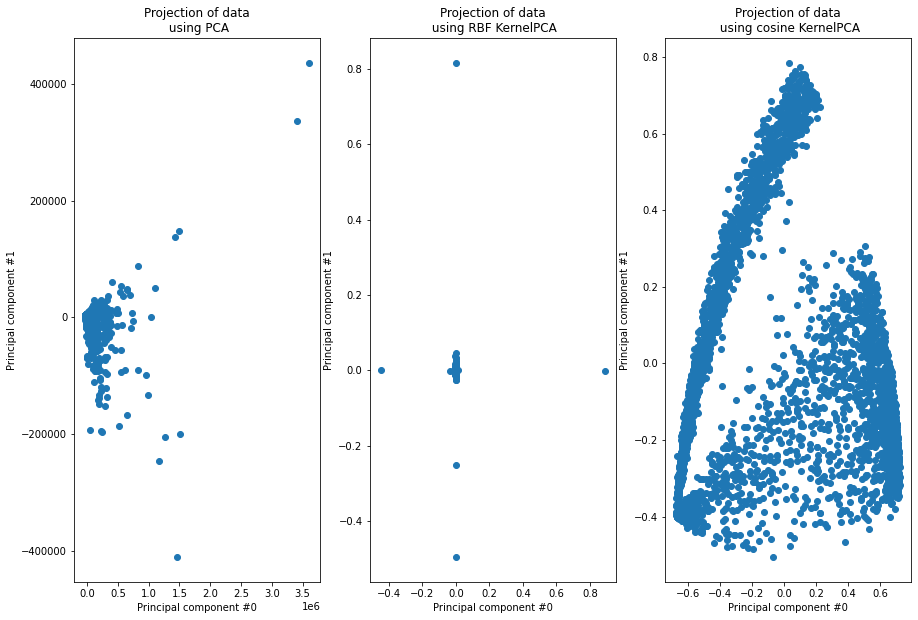

In [17]:
pca = PCA(n_components=2)

# lin_kernel_pca = KernelPCA(
#     n_components=None, kernel="linear", gamma=10, fit_inverse_transform=True, alpha=0.1
# )

# sig_kernel_pca = KernelPCA(
#     n_components=None, kernel="sigmoid", gamma=10, fit_inverse_transform=True, alpha=0.1
# )

cos_kernel_pca = KernelPCA(
    n_components=None, kernel="cosine", gamma=10, fit_inverse_transform=True, alpha=0.1
)

rbf_kernel_pca = KernelPCA(
    n_components=None, kernel="rbf", gamma=10, fit_inverse_transform=True, alpha=0.1
)

counts_pca = pca.fit(counts).transform(counts)
# lin_counts_kernel_pca = lin_kernel_pca.fit(counts).transform(counts)
# sig_counts_kernel_pca = sig_kernel_pca.fit(counts).transform(counts)
cos_counts_kernel_pca = cos_kernel_pca.fit(counts).transform(counts)
rbf_counts_kernel_pca = rbf_kernel_pca.fit(counts).transform(counts)

fig, (pca_proj_ax, rbf_counts_kernel_pca_proj_ax, cos_counts_kernel_pca_proj_ax) = plt.subplots(
    ncols=3, figsize=(15,10) )

pca_proj_ax.scatter(counts_pca[:, 0], counts_pca[:, 1])
pca_proj_ax.set_ylabel("Principal component #1")
pca_proj_ax.set_xlabel("Principal component #0")
pca_proj_ax.set_title("Projection of data\n using PCA")

rbf_counts_kernel_pca_proj_ax.scatter(rbf_counts_kernel_pca[:, 0], rbf_counts_kernel_pca[:, 1])
rbf_counts_kernel_pca_proj_ax.set_ylabel("Principal component #1")
rbf_counts_kernel_pca_proj_ax.set_xlabel("Principal component #0")
_ = rbf_counts_kernel_pca_proj_ax.set_title("Projection of data\n using RBF KernelPCA")

# sig_counts_kernel_pca_proj_ax.scatter(sig_counts_kernel_pca[:, 0], sig_counts_kernel_pca[:, 1])
# sig_counts_kernel_pca_proj_ax.set_ylabel("Principal component #1")
# sig_counts_kernel_pca_proj_ax.set_xlabel("Principal component #0")
# _ = sig_counts_kernel_pca_proj_ax.set_title("Projection of data\n using Sigmoid KernelPCA")

# lin_counts_kernel_pca_proj_ax.scatter(lin_counts_kernel_pca[:, 0], lin_counts_kernel_pca[:, 1])
# lin_counts_kernel_pca_proj_ax.set_ylabel("Principal component #1")
# lin_counts_kernel_pca_proj_ax.set_xlabel("Principal component #0")
# _ = lin_counts_kernel_pca_proj_ax.set_title("Projection of data\n using linear KernelPCA")

cos_counts_kernel_pca_proj_ax.scatter(cos_counts_kernel_pca[:, 0], cos_counts_kernel_pca[:, 1])
cos_counts_kernel_pca_proj_ax.set_ylabel("Principal component #1")
cos_counts_kernel_pca_proj_ax.set_xlabel("Principal component #0")
_ = cos_counts_kernel_pca_proj_ax.set_title("Projection of data\n using cosine KernelPCA")

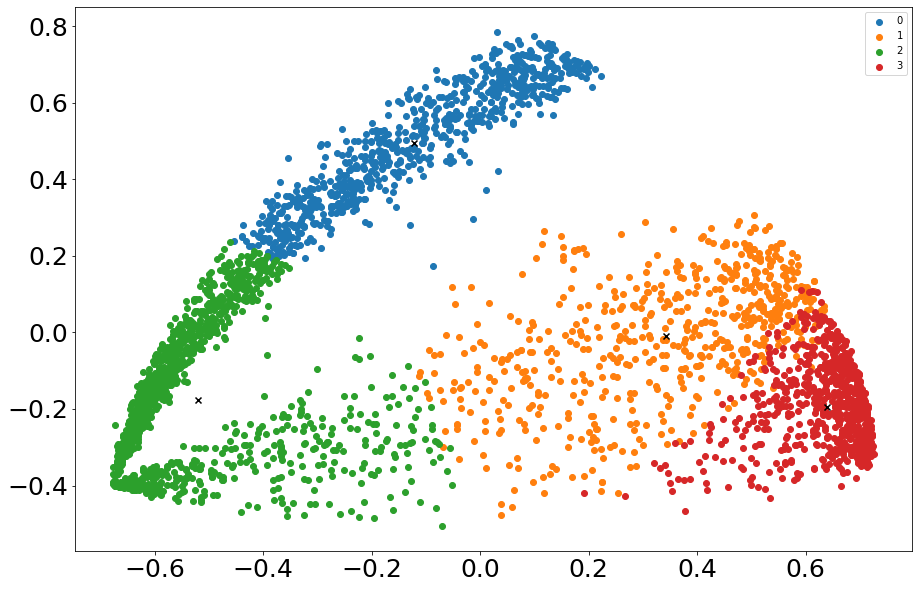

In [18]:
model = KMeans(n_clusters = 4, init = "k-means++", algorithm="full", random_state=3009)
label = model.fit_predict(cos_counts_kernel_pca)
centers = np.array(model.cluster_centers_)
plt.figure(figsize=(15,10))
uniq = np.unique(label)
for i in uniq:
   plt.scatter(cos_counts_kernel_pca[label == i , 0] , cos_counts_kernel_pca[label == i , 1] , label = i)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
# find the centroid for each cluster
plt.legend()

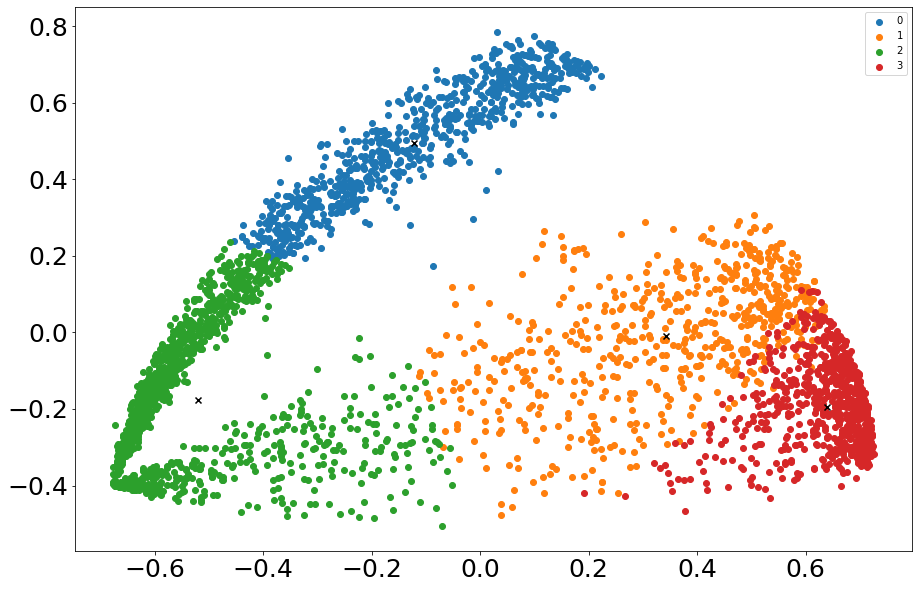

In [19]:
model = KMeans(n_clusters = 4, init = "k-means++", algorithm="elkan", random_state=3009)
label = model.fit_predict(cos_counts_kernel_pca)
centers = np.array(model.cluster_centers_)
plt.figure(figsize=(15,10))
uniq = np.unique(label)
for i in uniq:
   plt.scatter(cos_counts_kernel_pca[label == i , 0] , cos_counts_kernel_pca[label == i , 1] , label = i)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
# find the centroid for each cluster
plt.legend()

plt.savefig('kmeans_elkan_4_kpca_cosine_ds.pdf')

pd.DataFrame(centers).to_csv("cos_4_centers_ds.csv", index=True)

 ### T-SNE

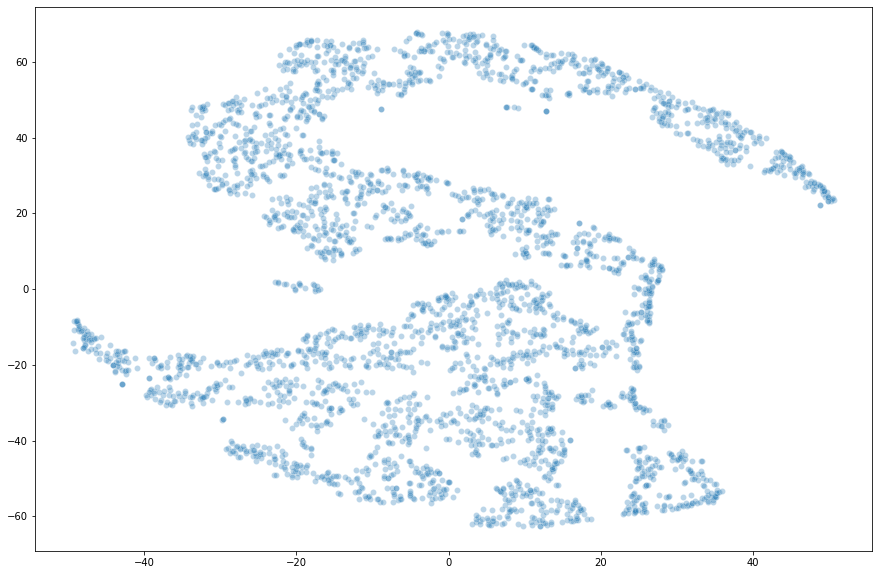

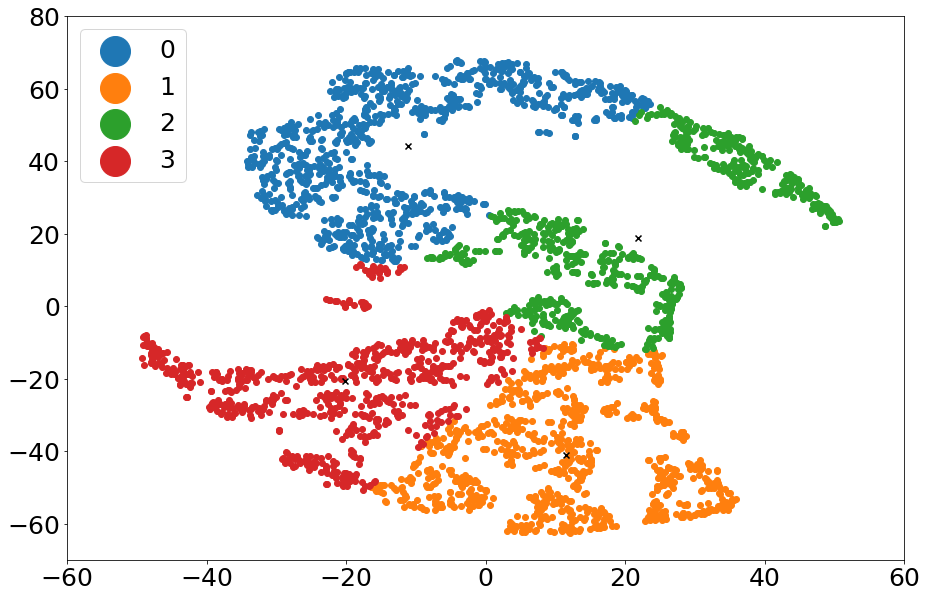

In [20]:
tsne = TSNE(n_components=2, learning_rate='auto', init='random', random_state=3009).fit_transform(counts)
tsne.shape

plt.figure(figsize=(15,10))
sns.scatterplot(
    x=tsne[:,0], y=tsne[:,1],
    # hue="y",
    palette=sns.color_palette("hls", 10),
    data=counts,
    legend="full",
    alpha=0.3
)
plt.savefig('tsne_ds.pdf')

model = KMeans(n_clusters = 4, init = "k-means++", algorithm="elkan", random_state=3009)
label = model.fit_predict(tsne)
centers = np.array(model.cluster_centers_)
plt.figure(figsize=(15,10))
uniq = np.unique(label)
for i in uniq:
   plt.scatter(tsne[label == i , 0] , tsne[label == i , 1] , label = i)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
plt.xlim([-60,60])
plt.ylim([-70,80])
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
# find the centroid for each cluster
plt.legend(fontsize=25, markerscale=5, loc =2)
plt.savefig('kmeans_elkan_4_tsne_ds.pdf')

In [21]:
tsne_cluster0 = df[model.labels_==0]
tsne_cluster1 = df[model.labels_==1]
tsne_cluster2 = df[model.labels_==2]
tsne_cluster3 = df[model.labels_==3]

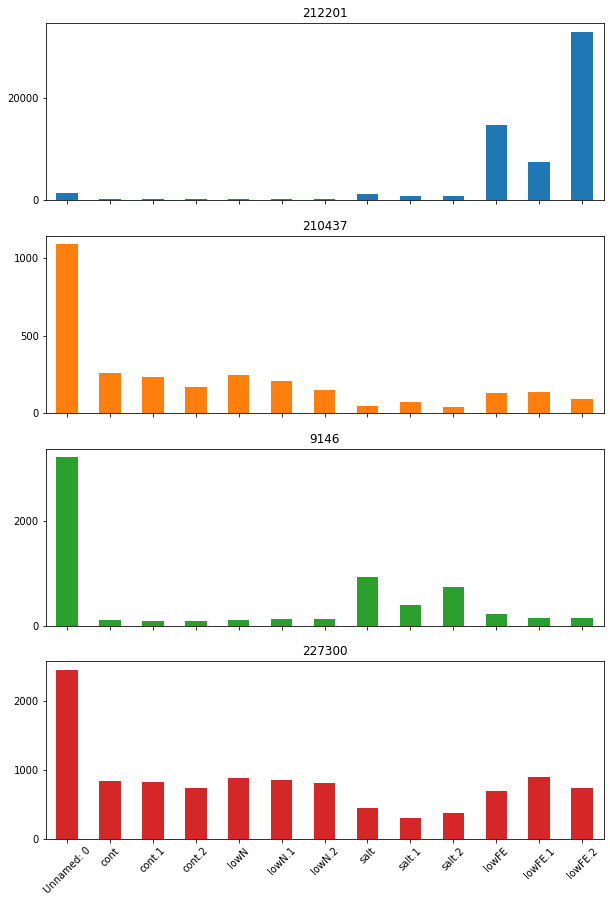

In [22]:
nbrs = NearestNeighbors(n_neighbors=4)
nbrs.fit(tsne)

neighbors_f_id = nbrs.kneighbors_graph(X = centers, n_neighbors = 1).indices

Ncenter0 = df.iloc[[neighbors_f_id[0],]]
Ncenter1 = df.iloc[[neighbors_f_id[1],]]
Ncenter2 = df.iloc[[neighbors_f_id[2],]]
Ncenter3 = df.iloc[[neighbors_f_id[3],]]

Ncenters = [Ncenter0, Ncenter1, Ncenter2, Ncenter3]
Ncenters = pd.concat(Ncenters)

Ncenters_t = np.transpose(Ncenters)
ax = Ncenters_t.plot.bar(rot=45, subplots = True, figsize=(10,15), linewidth=1,legend = False)
fig = ax[0].get_figure()
plt.rcParams['font.size'] = 25
fig.savefig('ds_Ncenters_t_axis_bar.pdf')

In [23]:
ds_mean_Ncenters_collapsedreps = pd.DataFrame()
ds_mean_Ncenters_collapsedreps.loc[0,0] = Ncenters[['cont', 'cont.1', 'cont.2']].iloc[0].mean()
ds_mean_Ncenters_collapsedreps.loc[0,1] = Ncenters[['lowN', 'lowN.1', 'lowN.2']].iloc[0].mean()
ds_mean_Ncenters_collapsedreps.loc[0,2] = Ncenters[['salt', 'salt.1', 'salt.2']].iloc[0].mean()
ds_mean_Ncenters_collapsedreps.loc[0,3] = Ncenters[['lowFE', 'lowFE.1', 'lowFE.2']].iloc[0].mean()

ds_mean_Ncenters_collapsedreps.loc[1,0] = Ncenters[['cont', 'cont.1', 'cont.2']].iloc[1].mean()
ds_mean_Ncenters_collapsedreps.loc[1,1] = Ncenters[['lowN', 'lowN.1', 'lowN.2']].iloc[1].mean()
ds_mean_Ncenters_collapsedreps.loc[1,2] = Ncenters[['salt', 'salt.1', 'salt.2']].iloc[1].mean()
ds_mean_Ncenters_collapsedreps.loc[1,3] = Ncenters[['lowFE', 'lowFE.1', 'lowFE.2']].iloc[1].mean()

ds_mean_Ncenters_collapsedreps.loc[2,0] = Ncenters[['cont', 'cont.1', 'cont.2']].iloc[2].mean()
ds_mean_Ncenters_collapsedreps.loc[2,1] = Ncenters[['lowN', 'lowN.1', 'lowN.2']].iloc[2].mean()
ds_mean_Ncenters_collapsedreps.loc[2,2] = Ncenters[['salt', 'salt.1', 'salt.2']].iloc[2].mean()
ds_mean_Ncenters_collapsedreps.loc[2,3] = Ncenters[['lowFE', 'lowFE.1', 'lowFE.2']].iloc[2].mean()

ds_mean_Ncenters_collapsedreps.loc[3,0] = Ncenters[['cont', 'cont.1', 'cont.2']].iloc[3].mean()
ds_mean_Ncenters_collapsedreps.loc[3,1] = Ncenters[['lowN', 'lowN.1', 'lowN.2']].iloc[3].mean()
ds_mean_Ncenters_collapsedreps.loc[3,2] = Ncenters[['salt', 'salt.1', 'salt.2']].iloc[3].mean()
ds_mean_Ncenters_collapsedreps.loc[3,3] = Ncenters[['lowFE', 'lowFE.1', 'lowFE.2']].iloc[3].mean()

ds_mean_Ncenters_collapsedreps.columns = ['cont','lowN','salt','lowFE']
ds_mean_Ncenters_collapsedreps.index = ['c0', 'c1', 'c2', 'c3']
ds_mean_Ncenters_collapsedreps.to_csv("ds_Ncenters_4_collapsedreps.csv", index=True)

ds_mean_Ncenters_collapsedreps

,cont,lowN,salt,lowFE
c0,225.500449,283.656838,978.697772,18412.342726
c1,218.266037,200.268830,52.237150,119.085118
c2,102.113479,125.739588,689.400814,175.683992
c3,797.243514,846.343560,367.535554,769.078445


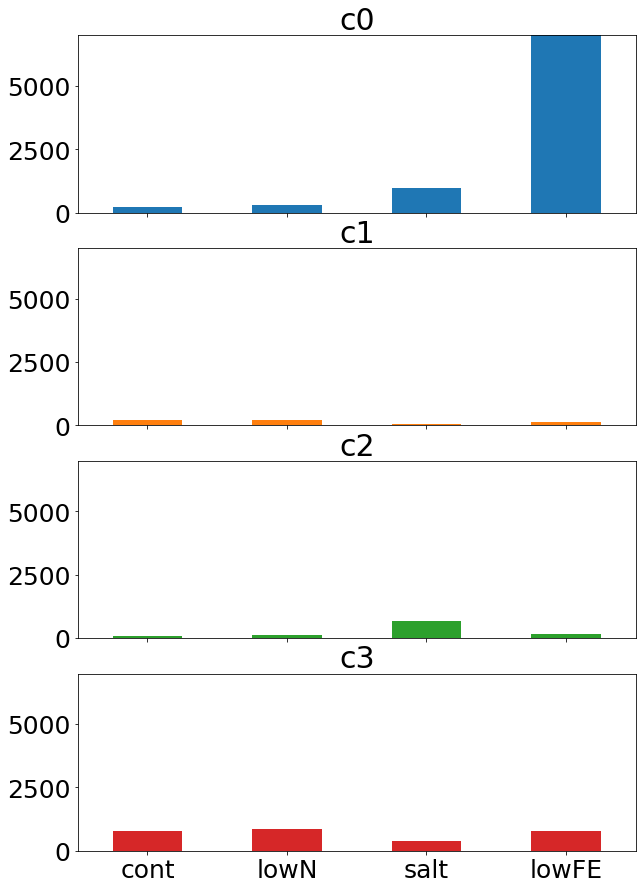

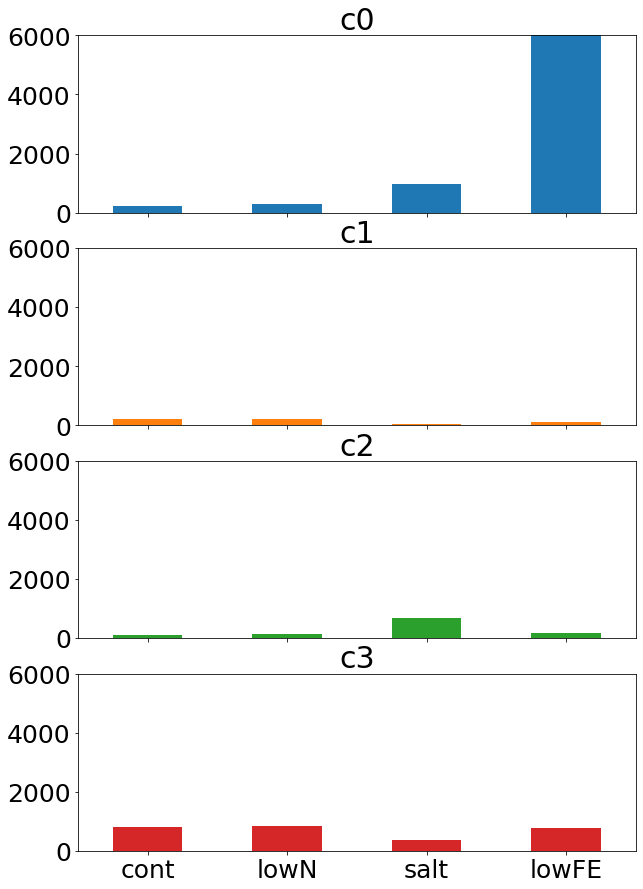

In [24]:
mean_Ncenters_t = np.transpose(ds_mean_Ncenters_collapsedreps)
ax = mean_Ncenters_t.plot.bar(rot=0, subplots = True, ylim=(0,7000), figsize=(10,15), linewidth=1,legend = False)
fig = ax[0].get_figure()
plt.rcParams['font.size'] = 25
fig.savefig('ds_Ncenters_t_collapsedreps_bar.pdf')

mean_Ncenters_t = np.transpose(ds_mean_Ncenters_collapsedreps)
ax = mean_Ncenters_t.plot.bar(rot=0, subplots = True, ylim=(0,6000), figsize=(10,15), linewidth=1,legend = False)
fig = ax[0].get_figure()
plt.rcParams['font.size'] = 25
fig.savefig('ds_Ncenters_t_collapsedreps_bar_6000.pdf')

In [25]:
pd.DataFrame(centers).to_csv("tsne_4_centers_ds.csv", index=True)

In [26]:
cluster0 = pd.DataFrame()
cluster0 = df[model.labels_==0]
cluster0.to_csv("cluster0_4_ds.csv", index=True)
cluster0_mean = pd.DataFrame()
cluster0_mean.loc[0,0] = cluster0['cont'].mean()
cluster0_mean.loc[0,1] = cluster0['cont.1'].mean()
cluster0_mean.loc[0,2] = cluster0['cont.2'].mean()
cluster0_mean.loc[0,3] = cluster0['lowN'].mean()
cluster0_mean.loc[0,4] = cluster0['lowN.1'].mean()
cluster0_mean.loc[0,5] = cluster0['lowN.2'].mean()
cluster0_mean.loc[0,6] = cluster0['salt'].mean()
cluster0_mean.loc[0,7] = cluster0['salt.1'].mean()
cluster0_mean.loc[0,8] = cluster0['salt.2'].mean()
cluster0_mean.loc[0,9] = cluster0['lowFE'].mean()
cluster0_mean.loc[0,10] = cluster0['lowFE.1'].mean()
cluster0_mean.loc[0,11] = cluster0['lowFE.2'].mean()
# cluster0_mean.to_csv("cluster0_mean_ds.csv", index=True)

cluster1 = pd.DataFrame()
cluster1 = df[model.labels_==1]
cluster1.to_csv("cluster1_4_ds.csv", index=True)
cluster1_mean = pd.DataFrame()
cluster1_mean.loc[0,0] = cluster1['cont'].mean()
cluster1_mean.loc[0,1] = cluster1['cont.1'].mean()
cluster1_mean.loc[0,2] = cluster1['cont.2'].mean()
cluster1_mean.loc[0,3] = cluster1['lowN'].mean()
cluster1_mean.loc[0,4] = cluster1['lowN.1'].mean()
cluster1_mean.loc[0,5] = cluster1['lowN.2'].mean()
cluster1_mean.loc[0,6] = cluster1['salt'].mean()
cluster1_mean.loc[0,7] = cluster1['salt.1'].mean()
cluster1_mean.loc[0,8] = cluster1['salt.2'].mean()
cluster1_mean.loc[0,9] = cluster1['lowFE'].mean()
cluster1_mean.loc[0,10] = cluster1['lowFE.1'].mean()
cluster1_mean.loc[0,11] = cluster1['lowFE.2'].mean()
# cluster1_mean.to_csv("cluster1_mean_ds.csv", index=True)

cluster2 = pd.DataFrame()
cluster2 = df[model.labels_==2]
cluster2.to_csv("cluster2_4_ds.csv", index=True)
cluster2_mean = pd.DataFrame()
cluster2_mean.loc[0,0] = cluster2['cont'].mean()
cluster2_mean.loc[0,1] = cluster2['cont.1'].mean()
cluster2_mean.loc[0,2] = cluster2['cont.2'].mean()
cluster2_mean.loc[0,3] = cluster2['lowN'].mean()
cluster2_mean.loc[0,4] = cluster2['lowN.1'].mean()
cluster2_mean.loc[0,5] = cluster2['lowN.2'].mean()
cluster2_mean.loc[0,6] = cluster2['salt'].mean()
cluster2_mean.loc[0,7] = cluster2['salt.1'].mean()
cluster2_mean.loc[0,8] = cluster2['salt.2'].mean()
cluster2_mean.loc[0,9] = cluster2['lowFE'].mean()
cluster2_mean.loc[0,10] = cluster2['lowFE.1'].mean()
cluster2_mean.loc[0,11] = cluster2['lowFE.2'].mean()
# cluster2_mean.to_csv("cluster2_mean_ds.csv", index=True)

cluster3 = pd.DataFrame()
cluster3 = df[model.labels_==3]
cluster3.to_csv("cluster3_4_ds.csv", index=True)
cluster3_mean = pd.DataFrame()
cluster3_mean.loc[0,0] = cluster3['cont'].mean()
cluster3_mean.loc[0,1] = cluster3['cont.1'].mean()
cluster3_mean.loc[0,2] = cluster3['cont.2'].mean()
cluster3_mean.loc[0,3] = cluster3['lowN'].mean()
cluster3_mean.loc[0,4] = cluster3['lowN.1'].mean()
cluster3_mean.loc[0,5] = cluster3['lowN.2'].mean()
cluster3_mean.loc[0,6] = cluster3['salt'].mean()
cluster3_mean.loc[0,7] = cluster3['salt.1'].mean()
cluster3_mean.loc[0,8] = cluster3['salt.2'].mean()
cluster3_mean.loc[0,9] = cluster3['lowFE'].mean()
cluster3_mean.loc[0,10] = cluster3['lowFE.1'].mean()
cluster3_mean.loc[0,11] = cluster3['lowFE.2'].mean()
# cluster3_mean.to_csv("cluster3_mean_ds.csv", index=True)

In [27]:
ds_cluster_size = pd.DataFrame()
ds_cluster_size.loc[0,0] = "cluster_0"
ds_cluster_size.loc[0,1] = len(cluster0)

ds_cluster_size.loc[1,0] = "cluster_1"
ds_cluster_size.loc[1,1] = len(cluster1)

ds_cluster_size.loc[2,0] = "cluster_2"
ds_cluster_size.loc[2,1] = len(cluster2)

ds_cluster_size.loc[3,0] = "cluster_3"
ds_cluster_size.loc[3,1] = len(cluster3)

ds_cluster_size
ds_cluster_size.to_csv("cluster_4_size_ds.csv", index=True)

In [28]:
ds_clusters = [cluster0_mean, cluster1_mean, cluster2_mean, cluster3_mean]

ds_mean = pd.concat(ds_clusters)
ds_mean.index = ['c0', 'c1', 'c2', 'c3']
ds_mean.columns = [features]
# ds_mean = ds_mean.rename_axis(index='clusters', columns='features')
ds_mean

ds_mean.to_csv("mean_4_ds.csv", index=True)

In [29]:
ds_mean_collapsedreps = pd.DataFrame()
ds_mean_collapsedreps.loc[0,0] = ds_mean[['cont', 'cont.1', 'cont.2']].iloc[0].mean()
ds_mean_collapsedreps.loc[0,1] = ds_mean[['lowN', 'lowN.1', 'lowN.2']].iloc[0].mean()
ds_mean_collapsedreps.loc[0,2] = ds_mean[['salt', 'salt.1', 'salt.2']].iloc[0].mean()
ds_mean_collapsedreps.loc[0,3] = ds_mean[['lowFE', 'lowFE.1', 'lowFE.2']].iloc[0].mean()

ds_mean_collapsedreps.loc[1,0] = ds_mean[['cont', 'cont.1', 'cont.2']].iloc[1].mean()
ds_mean_collapsedreps.loc[1,1] = ds_mean[['lowN', 'lowN.1', 'lowN.2']].iloc[1].mean()
ds_mean_collapsedreps.loc[1,2] = ds_mean[['salt', 'salt.1', 'salt.2']].iloc[1].mean()
ds_mean_collapsedreps.loc[1,3] = ds_mean[['lowFE', 'lowFE.1', 'lowFE.2']].iloc[1].mean()

ds_mean_collapsedreps.loc[2,0] = ds_mean[['cont', 'cont.1', 'cont.2']].iloc[2].mean()
ds_mean_collapsedreps.loc[2,1] = ds_mean[['lowN', 'lowN.1', 'lowN.2']].iloc[2].mean()
ds_mean_collapsedreps.loc[2,2] = ds_mean[['salt', 'salt.1', 'salt.2']].iloc[2].mean()
ds_mean_collapsedreps.loc[2,3] = ds_mean[['lowFE', 'lowFE.1', 'lowFE.2']].iloc[2].mean()

ds_mean_collapsedreps.loc[3,0] = ds_mean[['cont', 'cont.1', 'cont.2']].iloc[3].mean()
ds_mean_collapsedreps.loc[3,1] = ds_mean[['lowN', 'lowN.1', 'lowN.2']].iloc[3].mean()
ds_mean_collapsedreps.loc[3,2] = ds_mean[['salt', 'salt.1', 'salt.2']].iloc[3].mean()
ds_mean_collapsedreps.loc[3,3] = ds_mean[['lowFE', 'lowFE.1', 'lowFE.2']].iloc[3].mean()

ds_mean_collapsedreps.columns = ['cont','lowN','salt','lowFE']
ds_mean_collapsedreps.index = ['c0', 'c1', 'c2', 'c3']
ds_mean_collapsedreps.to_csv("ds_mean_4_collapsedreps.csv", index=True)

ds_mean_collapsedreps

,cont,lowN,salt,lowFE
c0,1738.088422,1851.943505,7921.535657,2715.711754
c1,251.434472,214.277887,132.371231,178.673065
c2,6182.930044,6282.981561,57937.091316,9482.969349
c3,1174.413405,1095.318990,441.007222,893.267709


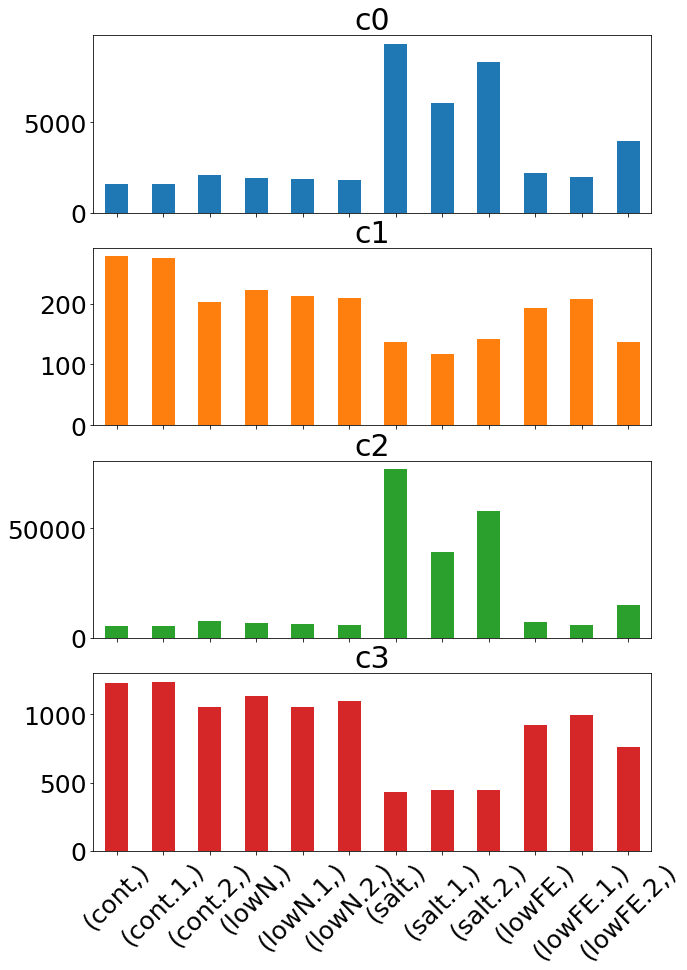

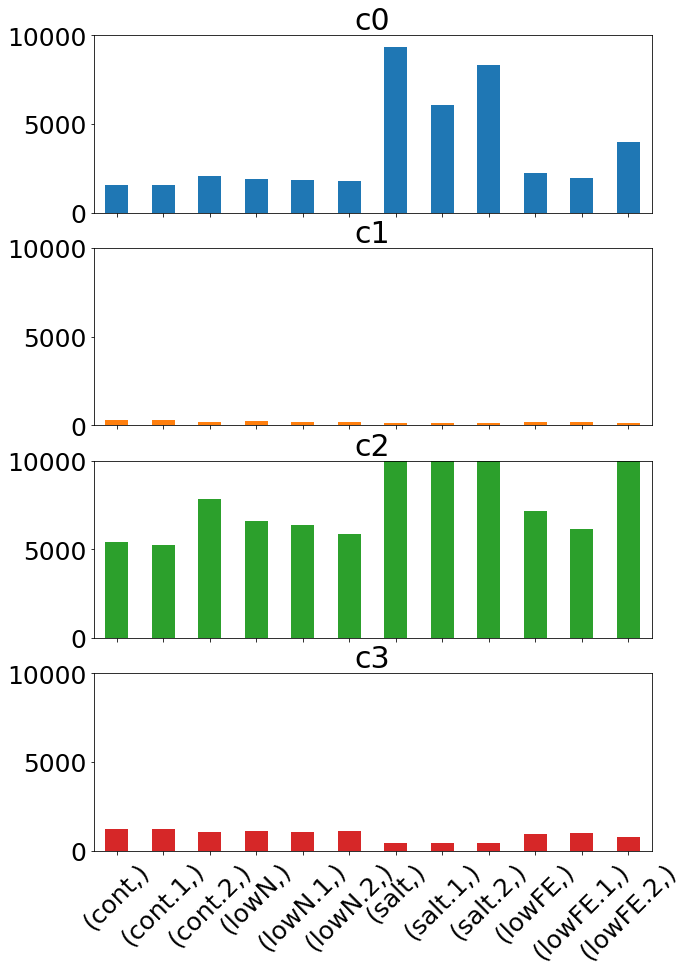

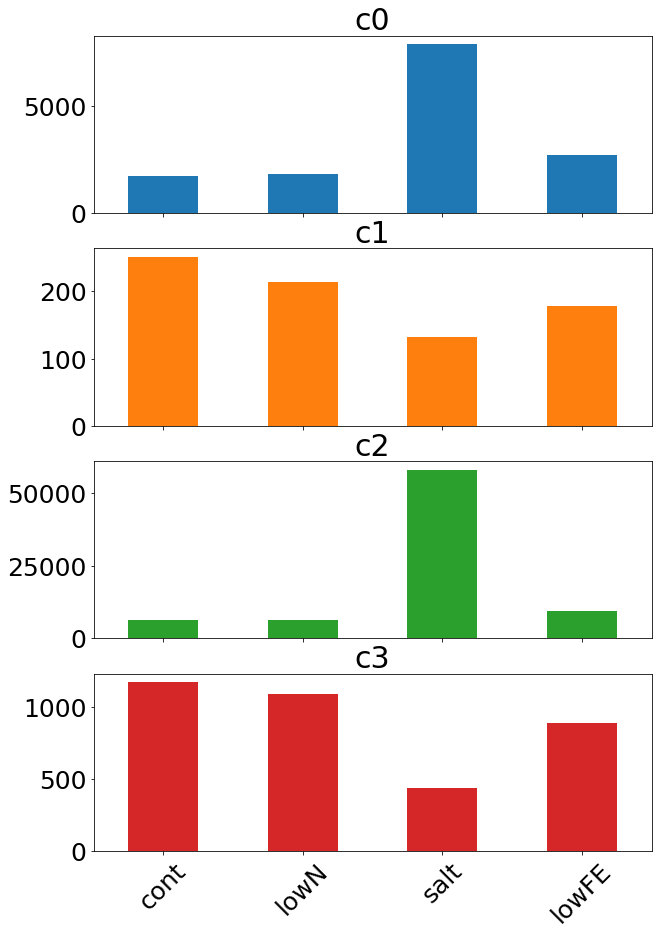

In [30]:
ds_mean_t = np.transpose(ds_mean)
ax = ds_mean_t.plot.bar(rot=45, subplots = True, figsize=(10,15), linewidth=1,legend = False)
fig = ax[0].get_figure()
plt.rcParams['font.size'] = 25
fig.savefig('ds_mean_4_axis_bar.pdf')

ax = ds_mean_t.plot.bar(rot=45, subplots = True, ylim=(0,10000), figsize=(10,15), linewidth=1,legend = False)
fig = ax[0].get_figure()
plt.rcParams['font.size'] = 25
fig.savefig('ds_mean_4_bar.pdf')

ds_mean_collapsedreps_t = np.transpose(ds_mean_collapsedreps)
ax = ds_mean_collapsedreps_t.plot.bar(rot=45, subplots = True, figsize=(10,15), linewidth=0.1,legend = False)
fig = ax[0].get_figure()
plt.rcParams['font.size'] = 25
fig.savefig('ds_mean_4_collapsedreps_bar.pdf')